In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'
pd.set_option('display.max_columns', None) ## 모든 열을 출력한다.
pd.set_option('display.max_rows', None) ## 모든 행을 출력한다.

In [54]:
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import make_pipeline
import joblib # 사이킷런 모델 저장 라이브러리

In [4]:
originalData = pd.read_excel("data.xlsx")
originalData

,시점,economicalActivePopulation,equipmentInvestment,realGDP
0,2000.25,21570,61.0,210585.8
1,2000.50,22262,66.6,225287.6
2,2000.75,22421,63.8,230172.3
3,2001.25,21783,57.9,221365.2
4,2001.50,22742,57.9,236420.0
5,2001.75,22749,59.5,238124.7
6,2002.25,22457,54.9,237385.4
7,2002.50,23219,56.6,254479.2
8,2002.75,23174,58.9,257558.0
9,2003.25,22556,64.8,247351.6


In [5]:
X_train, X_test, y_train, y_test = train_test_split(originalData.drop(['시점', 'realGDP'], axis=1), originalData.drop(['시점', 'economicalActivePopulation', 'equipmentInvestment'], axis=1), random_state=2)

In [6]:
print(X_train)
print(y_train)

    economicalActivePopulation  equipmentInvestment
13                       23717                 63.1
61                       28075                101.2
53                       27961                 90.1
55                       28125                 95.4
17                       23825                 65.7
63                       27748                104.1
54                       27464                 88.5
58                       28432                 89.8
12                       23139                 61.6
14                       23626                 57.5
46                       27382                 93.2
16                       23949                 62.1
2                        22421                 63.8
25                       24849                 76.2
19                       24242                 62.0
48                       26896                 93.6
6                        22457                 54.9
41                       26409                 90.9
24          

In [7]:
categorical = X_train.dtypes == object
categorical

economicalActivePopulation    False
equipmentInvestment           False
dtype: bool

In [8]:
X_train_cont = X_train.loc[:, ~categorical]
X_train_cont

,economicalActivePopulation,equipmentInvestment
13,23717,63.1
61,28075,101.2
53,27961,90.1
55,28125,95.4
17,23825,65.7
63,27748,104.1
54,27464,88.5
58,28432,89.8
12,23139,61.6
14,23626,57.5


Text(0.5, 0, 'realGDP')

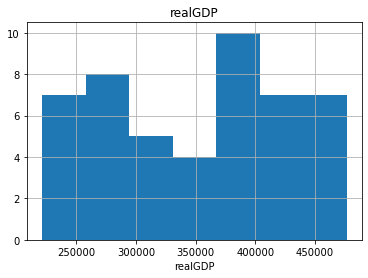

In [9]:
y_train.hist(bins='auto')
plt.xlabel('realGDP')

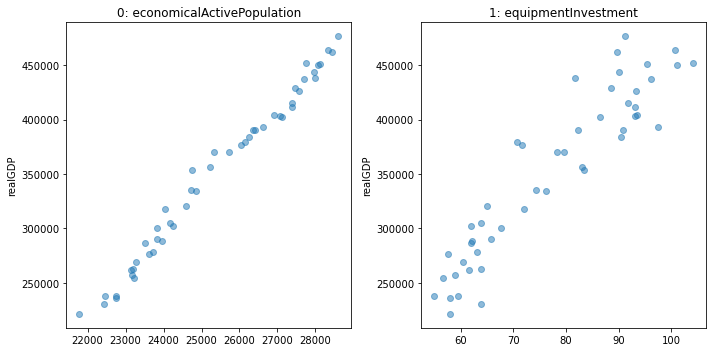

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
for i, ax in enumerate(axes.ravel()): #enumerate:순서와 리스트의 값 전달, ravel: 다차원 배열을 1차원 배열로 평평하게 펴줌
    ax.plot(X_train_cont.iloc[:, i], y_train, 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, X_train_cont.columns[i]))
    ax.set_ylabel("realGDP")
plt.tight_layout()

In [17]:
cat_preprocessing = make_pipeline(SimpleImputer(strategy='constant', fill_value='NA'), OneHotEncoder(handle_unknown='ignore'))
cont_preprocessing = make_pipeline(SimpleImputer(strategy='mean'), MinMaxScaler())

preprocess = make_column_transformer((cat_preprocessing, make_column_selector(dtype_include='object')), remainder=cont_preprocessing)

In [18]:
preprocess

ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                            ('minmaxscaler', MinMaxScaler())]),
                  transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001F39D9289D0>)])

In [19]:
cross_val_score(make_pipeline(preprocess, LinearRegression()), X_train, y_train, cv=5)

array([0.99728808, 0.9782532 , 0.96930589, 0.98088797, 0.98547109])

In [20]:
cross_val_score(make_pipeline(preprocess, TransformedTargetRegressor(LinearRegression(), func=np.log, inverse_func=np.exp)), X_train_cont, y_train, cv=5)

array([0.98681033, 0.96046727, 0.93783843, 0.94933032, 0.9849543 ])

In [43]:
param_grid = {'alpha': np.logspace(-4, -1, 10), 'l1_ratio': [0.01, .1, .5, .8, .9, .95, .98, 1]}
print(param_grid)

{'alpha': array([0.0001    , 0.00021544, 0.00046416, 0.001     , 0.00215443,
       0.00464159, 0.01      , 0.02154435, 0.04641589, 0.1       ]), 'l1_ratio': [0.01, 0.1, 0.5, 0.8, 0.9, 0.95, 0.98, 1]}


In [44]:
grid = GridSearchCV(ElasticNet(normalize=True, max_iter=1e6), param_grid, cv=RepeatedKFold(10, 10), return_train_score=True) #normalize=True이므로 X를 정규화함
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_score_)

C:\anaconda\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_splits=10, n_repeats=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


{'alpha': 0.0001, 'l1_ratio': 0.01}
0.9725166521379998


In [52]:
grid.score(X_test, y_test)

0.9777329624013009

In [46]:
pd.DataFrame(grid.cv_results_).columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_alpha', 'param_l1_ratio', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score',
       ...
       'split92_train_score', 'split93_train_score', 'split94_train_score',
       'split95_train_score', 'split96_train_score', 'split97_train_score',
       'split98_train_score', 'split99_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object', length=212)

In [47]:
res = pd.pivot_table(pd.DataFrame(grid.cv_results_), values='mean_test_score', index='param_alpha', columns='param_l1_ratio')
pd.set_option("display.precision", 3)
res = res.set_index(res.index.values.round(4))
res

param_l1_ratio,0.01,0.10,0.50,0.80,0.90,0.95,0.98,1.00
1.000e-04,0.973,0.973,0.972,0.972,0.972,0.972,0.972,0.972
2.000e-04,0.972,0.972,0.973,0.972,0.972,0.972,0.972,0.972
5.000e-04,0.971,0.972,0.972,0.973,0.972,0.972,0.972,0.972
1.000e-03,0.968,0.968,0.971,0.972,0.973,0.972,0.972,0.972
2.200e-03,0.959,0.960,0.967,0.971,0.972,0.973,0.972,0.972
4.600e-03,0.941,0.944,0.957,0.968,0.971,0.972,0.973,0.972
1.000e-02,0.899,0.906,0.938,0.960,0.967,0.971,0.972,0.972
2.150e-02,0.787,0.807,0.891,0.943,0.959,0.967,0.971,0.972
4.640e-02,0.552,0.589,0.768,0.904,0.941,0.957,0.968,0.972
1.000e-01,0.216,0.260,0.519,0.801,0.898,0.938,0.960,0.972


Text(33.0, 0.5, 'alpha')

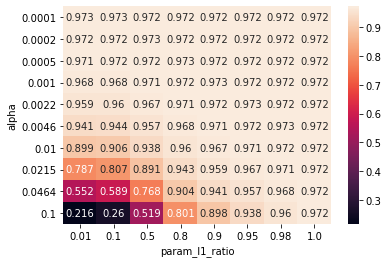

In [48]:
sns.heatmap(res, annot=True, fmt=".3g")
plt.ylabel("alpha")

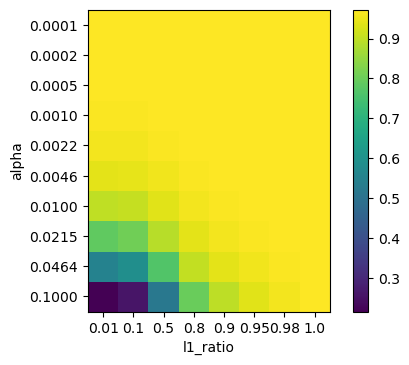

In [49]:
plt.figure(dpi=100)
plt.imshow(res) #, vmin=.70, vmax=.825)
plt.colorbar()
alphas = param_grid['alpha']
l1_ratio = np.array(param_grid['l1_ratio'])
plt.xlabel("l1_ratio")
plt.ylabel("alpha")
plt.yticks(range(len(alphas)), ["{:.4f}".format(a) for a in alphas])
plt.xticks(range(len(l1_ratio)), l1_ratio);

In [50]:
(grid.best_estimator_.coef_!= 0).sum()

2

In [55]:
joblib.dump(grid, './elasticnet_model.pkl')

['./elasticnet_model.pkl']